# Homework 5

Brandon Hawkins

For this homework assignment I will be using the MNIST data set. The data displays hand-drawn images from 0-9. We will be looking at different properties of this data set and analyze them.

Before starting the assignment, I want to thank Tyler Folkman for his help with providing teaching materials, Conner Leavitt for teaching and answering questions, and Mitchell Pudil for helping me out with some of the code.

This assignement will be divided into four sections. Listed below is the format that will be followed.

1) PCA <br>
2) T-SNE <br>
3) K-means Clustering <br>
4) Hierarchical Clustering <br>

Let's begin by importing the necessary packages for this assignment.

In [41]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

Now we will download our data set that we will be using.

In [35]:
#downloading data set
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

Now we will briefly look at the data to see what we are dealing with. Let's look at the shape to see how many features and data points we have.

In [3]:
#look at the shape
X.shape

(70000, 784)

We can see that we have 784 features with 70,000 different numbers drawn.

Let's look at a few different numbers just to get an idea of what we are dealing with.

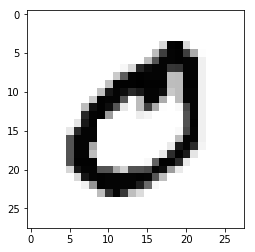

In [4]:
#view row 1
plt.imshow(X[1].reshape((28,28)), cmap='Greys')

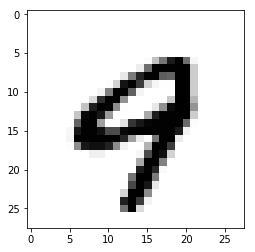

In [5]:
#view row 69,999
plt.imshow(X[69999].reshape((28,28)), cmap='Greys')

Now that we have a general idea, let's go ahead and jump into dealing with PCA.

## 1) PCA

For this question we will be exploring PCA and discussing what it does. When dealing with PCA, we are trying to reduce the dimensionality of our data in order to avoid overfitting.

Let's go ahead and run PCA and then talk about some of it's properties.

In [6]:
#Use PCA to explain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
#print shape of PCA fitted data to see how many features are left
print(X_pca.shape)

(70000, 154)


### a)  When using PCA it is common to reduce the dimensionality until it explains 95% of the variance. We did this above and can see that using 154 components describe 95% of the variance of the data. Given this information, we will use 154 components.

Now let's go ahead and plot our first two components to discuss why they were chosen and what they mean.

In [7]:
#define components 1 and 2
component1 = pca.components_.T[:,0]
component2 = pca.components_.T[:,1]

#scale data
scaled_X = X - X.mean()

Text(0.5,1,'First Component')

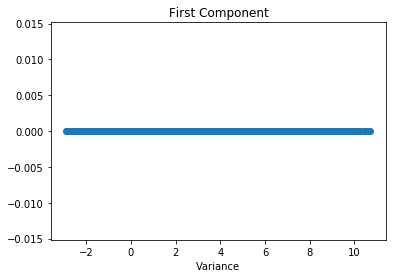

In [8]:
#plot component 1
proj_1 = scaled_X.dot(component1)
plt.scatter(proj_1, np.zeros(len(proj_1)))
plt.xlabel('Variance')
plt.title('First Component')

Text(0.5,1,'Second Component')

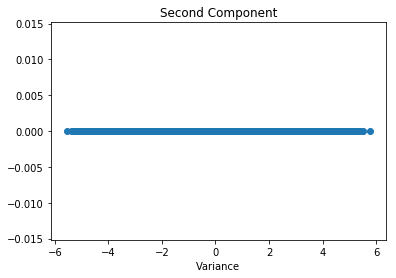

In [9]:
#plot component 2
proj_2 = scaled_X.dot(component2)
plt.scatter(proj_2, np.zeros(len(proj_2)))
plt.xlabel('Variance')
plt.title('Second Component')

Text(0,0.5,'Second Component')

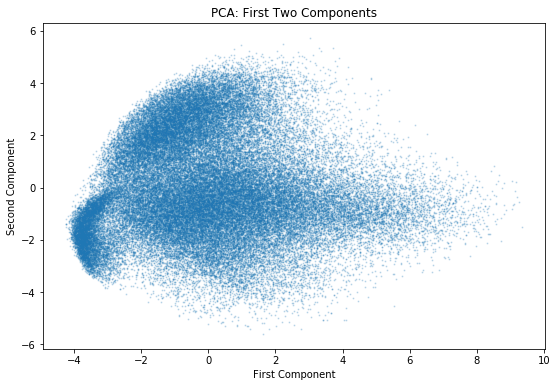

In [10]:
#first reduce dimensionality before feeding to t-sne
pca_2 = PCA(n_components=50)
X_pca_2 = pca_2.fit_transform(X)

#plot first two dimensions
fig = plt.figure(figsize=(9,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], marker='.', alpha=.2, s = 4)
plt.title('PCA: First Two Components')
plt.xlabel('First Component')
plt.ylabel('Second Component')

### b) In looking at these graphs we can see the variance for each of the first two components used. The first component was chosen because it covered the greatest variance within the data set. The second component was chosen because it is orthogonal to the first component. We can see that the first component covers greater variance than the second one and the second component is trying to capture additional variance. Noticing these trends helps us to identify why these components were chosen first and second and how they help us to understand the data.

### c) We would use PCA to help us aviod overfitting the data and reduce the dimensionality. Above, we were able to reduce the number of features we were using from 784 to 154 while still covering 95% of the variance. This means that the rest of the features only helped to describe the data by much smaller amounts compared to the first 154 components. Some of the drawbacks to using PCA are that it may not be the best if the data is not linearly related, if you are not concerned with covering the most various it may not help answer your problem, and it may restrict your model by using orthogonal components when they do not best describe your data.

### d) Now we will go ahead and plot some of our images before using PCA and after using PCA to see what they look like.

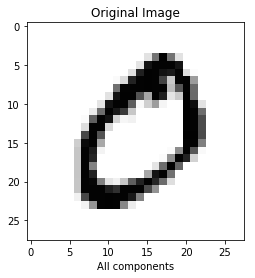

In [11]:
#function to plot original image
def orig_number(row_number):
    plt.imshow(mnist['data'][row_number].reshape(28,28),
                  cmap ='Greys', interpolation='nearest',
                  clim=(0, 255));
    plt.xlabel('All components')
    plt.title('Original Image');

#plot original row 0
orig_number(0)

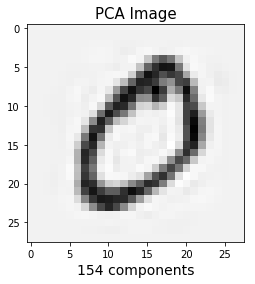

In [12]:
#function to plot PCA image
def PCA_number(row_number):
    X_back = pca.inverse_transform(X_pca)
    plt.imshow(X_back[row_number].reshape((28,28)), cmap='Greys');
    plt.xlabel('154 components', fontsize = 14)
    plt.title('PCA Image', fontsize = 15);
    
#plot PCA row 0
PCA_number(0)

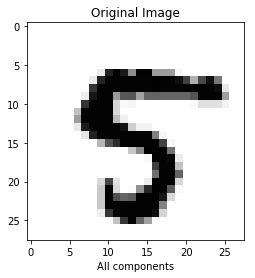

In [13]:
#plot original row 33000
orig_number(33000)

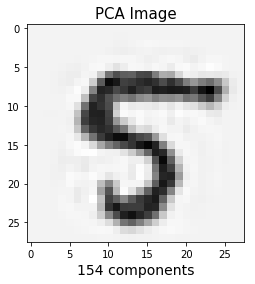

In [14]:
#plot PCA row 33000
PCA_number(33000)

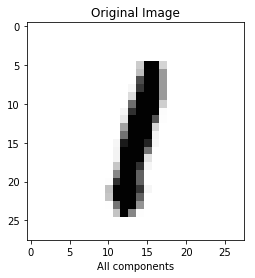

In [15]:
#plot original row 7200
orig_number(7200)

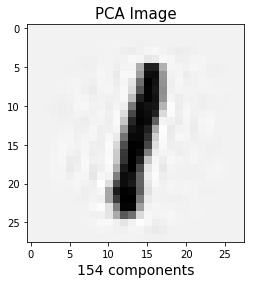

In [16]:
#plot PCA row 7200
PCA_number(7200)

In looking at these we can definitely tell that there is a difference but we can also make out the shape of the number when using PCA to give us a good idea of what the number is.

## 2) T-SNE

We will now use T-SNE to plot the first two components.

In [17]:
#first reduce dimensionality before feeding to t-sne
pca_2 = PCA(n_components=50)
X_pca_2 = pca_2.fit_transform(X)

#Using 10,000 rows
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 13.297s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.643585
[t-SNE] Error after 1000 iterations: 1.696833


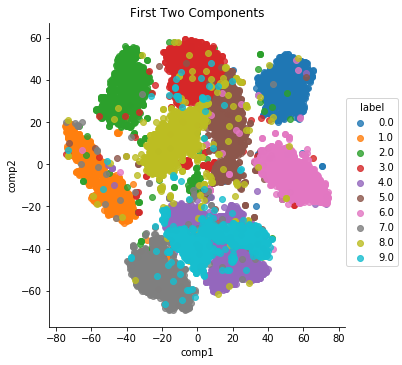

In [18]:
#function to fit t-sne and plot results
def t_sne(perp, iterations, learn):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iterations, learning_rate=learn)
    tsne_results = tsne.fit_transform(X_pca_2[rows[:n_select],:])
    
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
        
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
    ax = plt.gca()
    ax.set_title("First Two Components")

t_sne(50,1000,200)

### a) This plot differs from our PCA by our PCA plot was showing us the actual hand-written number images that could be seen once we reduced dimensionality and t-SNE visually shows us how well we are predicting and grouping each hand-written number. With PCA we could see what the computer was actually viewing and with t-SNE we are seeing clusters of predictions based on what the computer was viewing.

### b)

Now let's go ahead and see how t-SNE is affected with changes in perplexity. We typically want perplexity to range from 5-50 and do not want to exceed our number of observations. We will use a couple different values spaced between 5 and 50.

Let's start with a perplexity of 5

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 10.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.096446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.655533
[t-SNE] Error after 1000 iterations: 1.940456


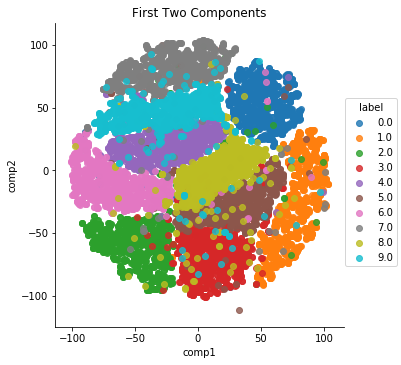

In [19]:
#t-SNE with perplexity of 5
t_sne(5,1000,200)

Now let's try perplexity of 20.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 11.745s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.594023
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.731255
[t-SNE] Error after 1000 iterations: 1.856395


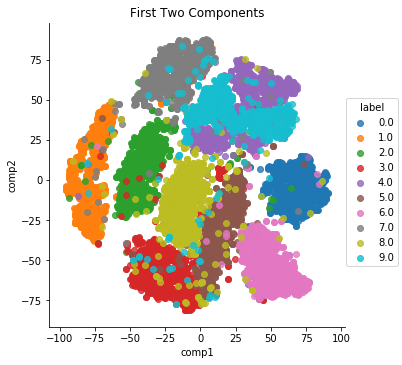

In [20]:
#t-SNE with perplexity of 20
t_sne(20,1000,200)

And now let's try 35.

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 12.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.789624
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.916771
[t-SNE] Error after 1000 iterations: 1.771902


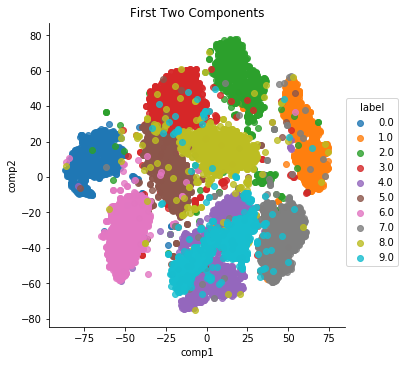

In [21]:
#t-SNE with perplexity of 35
t_sne(35,1000,200)

### Our model does not appear to be very robust to changes in perplexity. We can see from our results that some values of perplexity do a much better job at separating the clusters than other values. Some values mix up more information than others while other values are more clearly separated.

### c)

Now let's go ahead and try a few different learning rates and number of iterations to see how robust t-SNE is to these values.

We'll start with change our learning rates. We will try two different values, one smaller value and one larger to see what happens.

We will use the original perplexity value of 50 and will try using a learning rate of 100.|

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 12.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.640923
[t-SNE] Error after 1000 iterations: 1.734080


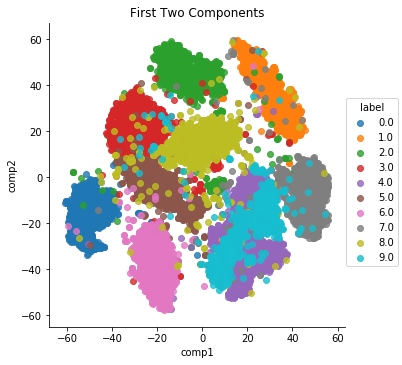

In [22]:
#t-SNE with learning rate of 100
t_sne(50,1000,100)

Now let's try a learning rate of 300.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 12.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.629677
[t-SNE] Error after 1000 iterations: 1.698909


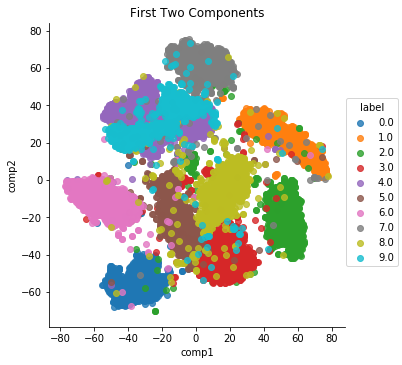

In [23]:
#t-SNE with learning rate of 300
t_sne(50,1000,300)

### It appears that the model is a bit more robust to changes in the learning rate than perplexity. While changes in the learning rate do change the graph the changes aren't as drastic as with perplexity. It seems that the learning rate is robust to a point, but I'm sure that when on extreme ends it will alter the graph by more.

Now that we have changed our learning rate, let's see what happens when we change our number of iterations.

Let's see what happens when we use 500 number of iterations.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 12.588s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.637779
[t-SNE] Error after 500 iterations: 1.882935


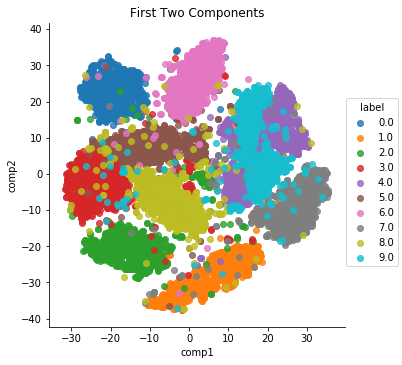

In [24]:
#t-SNE with number of iterations of 500
t_sne(50,500,200)

Now let's check to see what happens when we increase the number of iterations to 2,000

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 12.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.918570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.641762
[t-SNE] Error after 2000 iterations: 1.662500


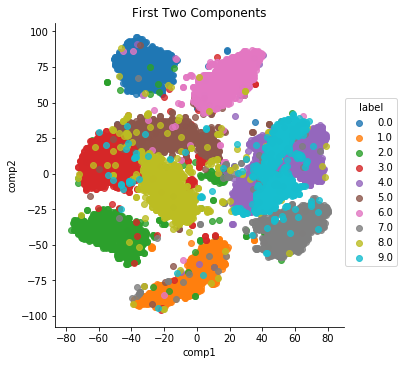

In [25]:
#t-SNE with number of iterations of 2,000
t_sne(50,2000,200)

### It appears that it is the less robust to changes in the number of iterations but about as robust as changes in perplexity. In looking at the difference in the graphs, we can see that there are differences but the changes don't appear to be too drastic.

## 3) K-means Clustering

We will now use k-means clustering to cluster our data and analyze it. We'll scale the data, take a small sample of it, and create a data frame with the first two components.

In [4]:
# Scale the data
X_kmeans = preprocessing.scale(X)

In [5]:
# Take sample of the data
X_kmeans = shuffle(X_kmeans)[0:3000]

I took a sample of 3000 data points because it was the most data I could use before it took too long to run kmeans.

In [6]:
# Two first components
pca_kmeans = PCA(n_components=2)
X_kmeans = pca_kmeans.fit_transform(X_kmeans)

In [7]:
#create data frame
kmeans_2 = pd.DataFrame({'comp1':X_kmeans[:,0], 'comp2':X_kmeans[:,1]})

In [8]:
#kmeans model
def kmeans(clusters, iterations):
    kmeans_model = KMeans(n_clusters=clusters, n_init=iterations, n_jobs=-1).fit(X_kmeans)
    labels = kmeans_model.labels_
    #silhouette score
    score = round(silhouette_score(kmeans_2[['comp1', 'comp2']], labels, metric='euclidean'),3)
    #print score
    print(score)

### a) Now that we have coded our k-means clustering model we have to decide how to choose our hyper-parameter "k". This is the number of clusters that we want to have. There are a couple ways we could decide this. If we didn't have any intuition behind how many clusters we wanted we could use an elbow graph, but since we know that we are looking for ten clusters will go ahead and use ten.

In [10]:
#kmeans with 10 clusters and 50 iterations
kmeans(10,50)

0.506


### b) After running our k-means clustering model it printed out a silhouette score to evaluate our model. The silhouette score tries to identify how close points in one cluster are to neighboring clusters. It results in a numeric result from -1 to 1. One is the best, meaning our model did a decent job but could potentially do better.

### c)

We will now visualize our model using t-SNE.

In [22]:
#create function to plot with t-sne
def kmeans_tsne(clusters, iterations):
    kmeans_model = KMeans(n_clusters=clusters, n_init=iterations, n_jobs=-1).fit(X_kmeans)
    labels = kmeans_model.labels_

    # Create dataframe of results
    kmeans_tsne = pd.DataFrame(X_kmeans, columns=['comp1', 'comp2'])
    kmeans_tsne['label'] = labels

    # Create the plot
    lm = sns.lmplot(x='comp1', y='comp2', data=kmeans_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=8)
    plt.title('K-means Clustering Components 1 & 2', fontsize=16, fontweight='bold')
    axes = lm.axes
    axes[0,0].set_ylim(-25,25)
    axes[0,0].set_xlim(-3,3)

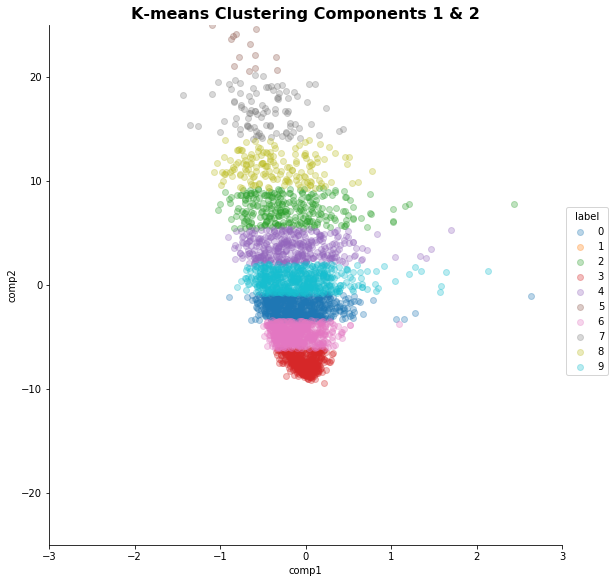

In [24]:
#plot kmeans with t-sne using 10 clusters
kmeans_tsne(10,50)

### d) I did scale my data before running it through k-means above. I did this because there were no features, such as latitude and longitude, that were important. Scaling the data helps to compare the different features.

### e) To determine the robustness of our model, I will try using different numbers of iterations to see how it changes. We will try using 25 and 100 to see what happens.

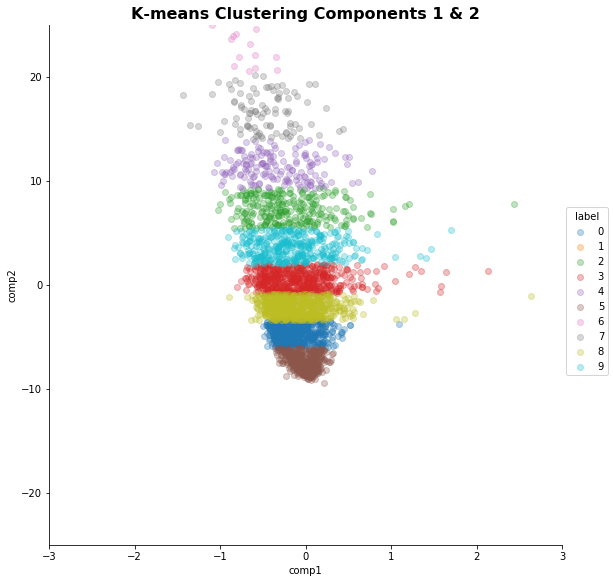

In [27]:
#kmeans with 25 iterations
kmeans_tsne(10,25)

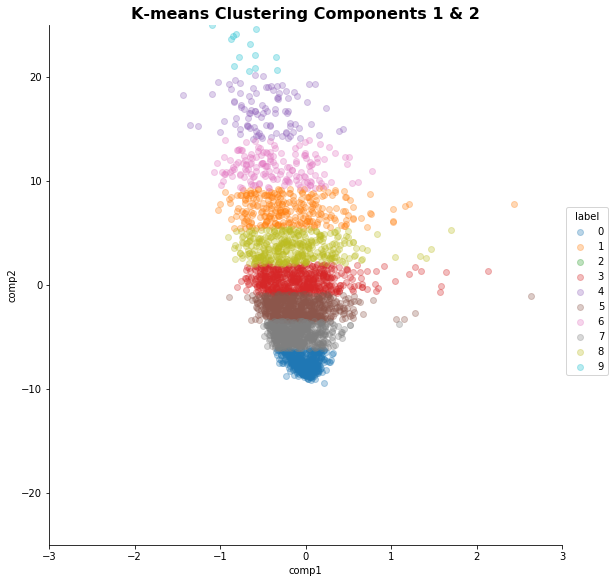

In [28]:
#kmeans with 100 iterations
kmeans_tsne(10,100)

It doesn't appear to be too different with changes to number of iterations. This can help us see that at least within the range that we experimented with it is robust.

It wouldn't make sense to see what the model does in responde to changing the number of clusters because we are specifically looking for ten different numbers but just for fun we can see what it does with 5 clusters.

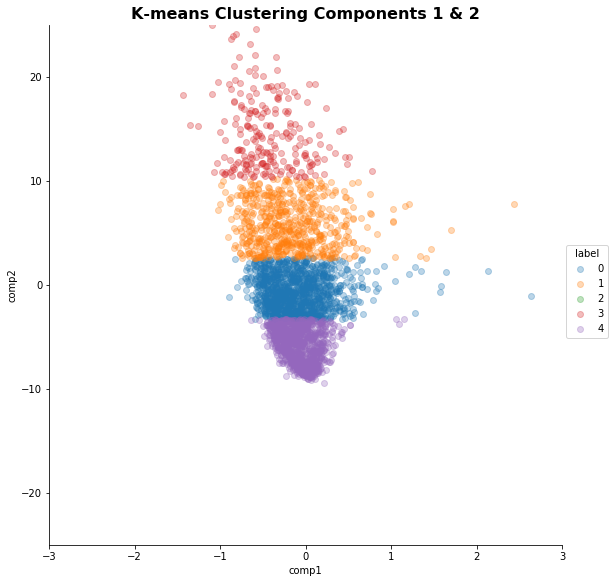

In [29]:
#kmeans with 5 clusters
kmeans_tsne(5,50)

There you go. Nothing too crazy, just 5 clusters instead of 10.

## Hierarchal Clustering

### a) We will begin by plotting a dendrogram to see our hierarchal clustering.

In [51]:
#function for plotting dendrogram
def dend(link_method):
    X_shuff = shuffle(X)
    #only use 100 data points
    Z = linkage(X_shuff[0:100], link_method)
    plt.figure(figsize=(20, 10))
    _ = dendrogram(Z)
    #label axis
    plt.ylabel('Linkage', fontsize = 14)
    plt.xlabel('Data Points', fontsize = 14)
    plt.title('Dendrogram', fontsize = 15)

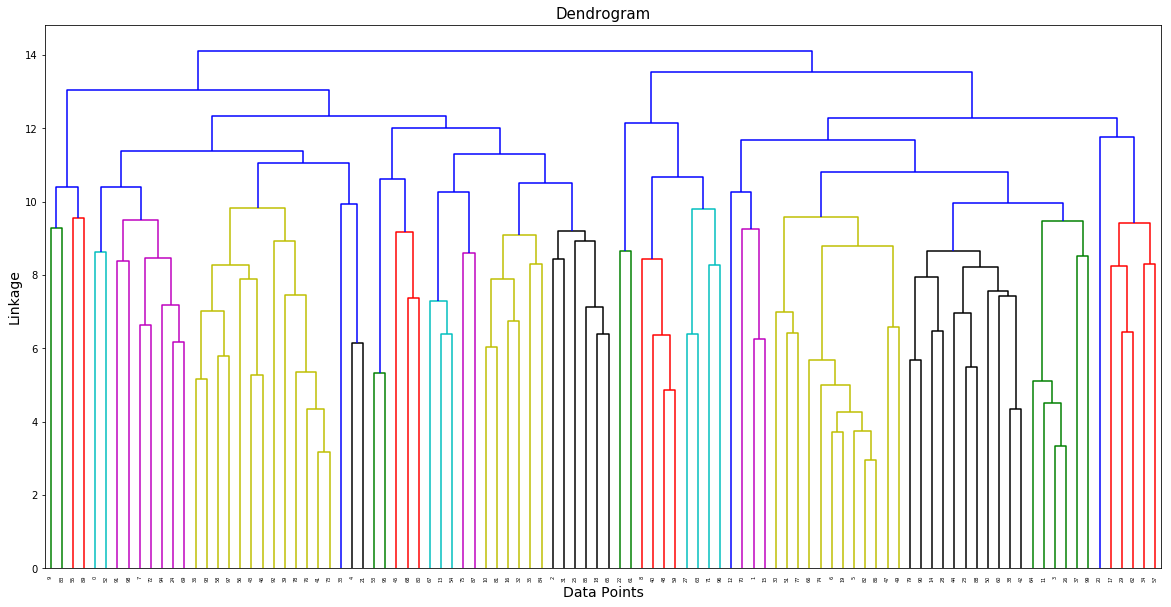

In [53]:
#plot dendrogram using complete linkage method
dend('complete')

It is important to note that we are only use 100 random data points so that we can better visualize this on our graph. I also used the complete linkage method which uses the maximum distance between clusters to link data points. We can interpret this as the lower on the y-axis that two points linked together, the more similar there are.

### b) Based on this graph alone, I would say that 8 clusters seem reasonable. I know we are looking for ten, but if I didn't know that I would probably say somewhere around 8. I would decide that by finding a reasonable place on the y-axis that doesn't seem like it would be overfitting and draw a horizontal point from that line. In this scenario, I would draw a ling from 12, which intersects 8 linkage lines. This would give me 8 clusters.

### c) Now let's see how our dendrogram changes with different linkage methods. We will use "ward" and "average". "Ward" merges clusters based on minimizing cluster variance and "average" links clusters based on average distance between data points within a cluster.

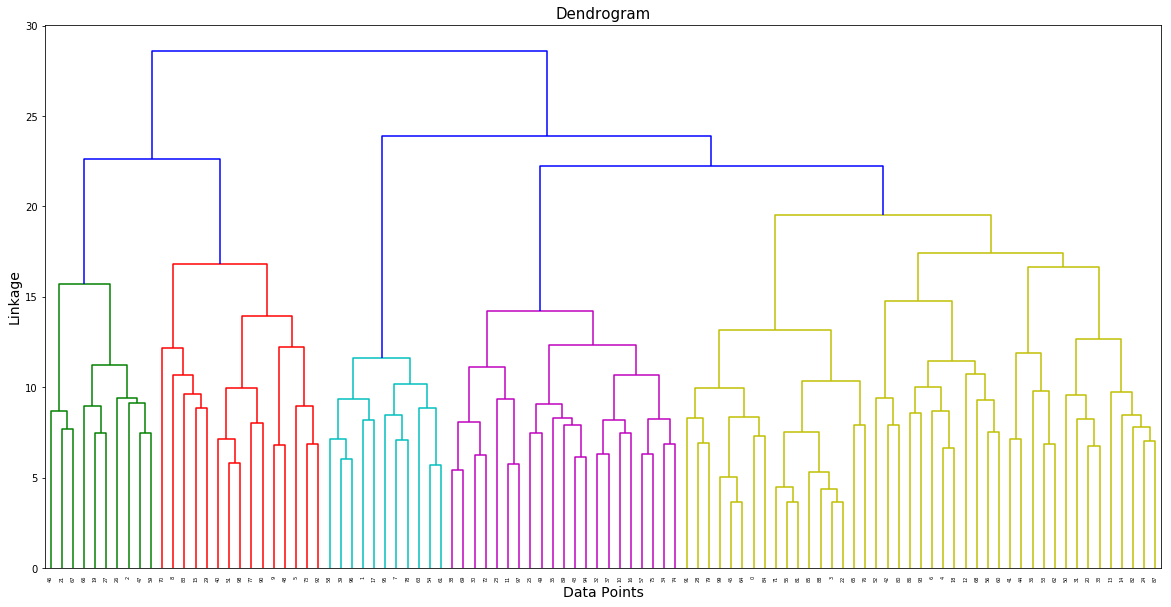

In [54]:
#plot dendrogram using ward linkage method
dend('ward')

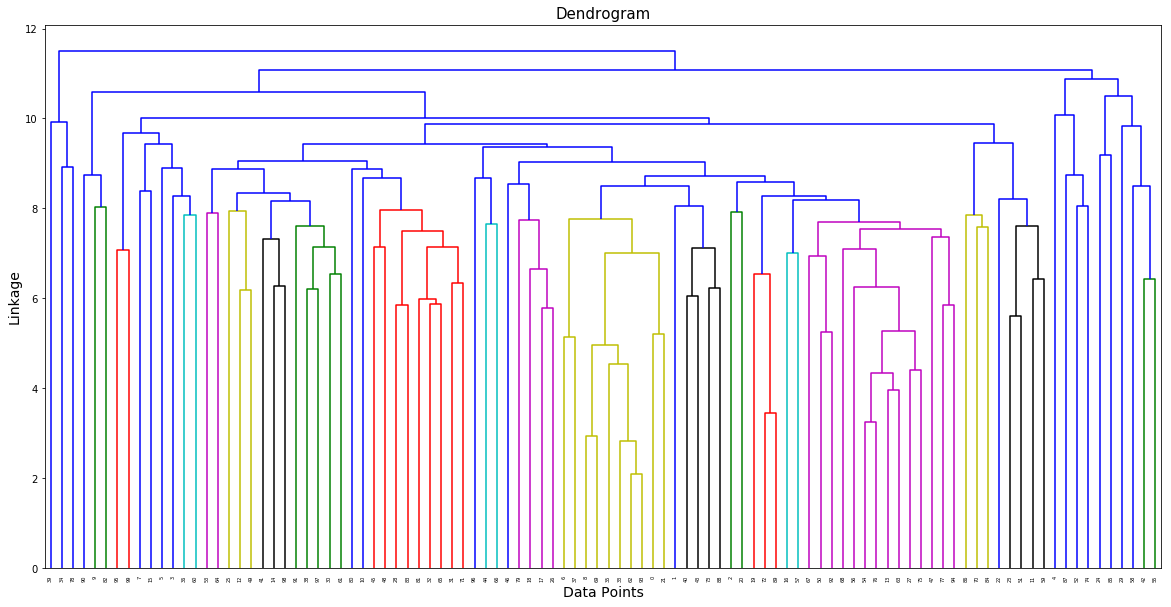

In [55]:
#plot dendrogram using average linkage method
dend('average')

It appears that our "ward" method linked data points together sooner and it appears that it is a much cleaner process. Using the "average" method links points together much later and is messier. If I were picking between using these three methods, I would choose the "ward" method because it appears to do a better job at differentiating between the data. It is also important to note that we are only using 100 random data points, which could change the dendrogram if another 100 points were drawn.

There you have it. We've explored using PCA, t-SNE, k-means Clustering, and hierarchal clustering.